# OLA 1 - Data Wrangling Football Events
***Navn:*** Kevin Richter Krogsgaard Andersen  
***Datasæt:*** https://www.kaggle.com/datasets/secareanualin/football-events?select=events.csv

Dette projekt udforsker et datasæt med hændelser fra fodboldkampe (mål, skud, kort, pasninger m.m.) og indeholder data cleaning, feature engineering og en simpel analyse med visualisering.

## Data Exploration and Cleaning
**Formål:** At forstå datastrukturen, samt rydde op i manglende værdier og outliers.

**Hvad vi gør:**
- Indlæser .csv filen med pandas
- Vi udforsker datasættet med `.info()`, `.describe()` og `.head()`
    - Vi behandler vores manglende værdier og dropper kolonner med >50% manglende værdier - f.eks `body_part`
    - Vi udfylder manglende info som `player` og `player2` med værdien `"Unknown"`
- Herefter fjerner vi ikke relevante kolonner og klargører til analyse
- Til sidst visualiserer vi hændelsestider og hændelsestyper med histogrammer og countplots

Alt dette resulterer i et renset datasæt som vi kan bruge i del 2: **Feature Engineering & Descriptive Statistics**

In [1]:
import pandas as pd

# Indlæs datasættet
df = pd.read_csv("events.csv")

# Første kig på datastrukturen
df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [2]:
# Vis info om kolonner og datatyper
df.info()

# Statistisk beskrivelse af numeriske kolonner
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


**Observationer:**  
- Datasættet indeholder over 940.000 hændelser.  
- `event_type`, `side`, `event_team`, `player` er kategoriske data.  
- `time`, `sort_order`, `is_goal` er numeriske værdier.  
- Nogle kolonner har mange manglende værdier, som vi nu vil behandle.

In [3]:
# Tjek for manglende værdier
df.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

**Plan:**  
Følgende kolonner har >50% manglende værdier og droppes:  
- `event_type2`, `player_in`, `player_out`, `shot_place`, `shot_outcome`, `bodypart`, `situation`, `location`  

Vi beholder `player` samt `player2`, og udfylder dem med `"Unknown"`.
Selvom `player2` har mange manglende værdier, synes jeg stadig den er værd at tage med, da det er sjældent der ikke er en spiller til at lave assisten.


In [4]:
# Vi dropper kolonner med for mange manglende værdier
df_clean = df.drop(columns=[
    'event_type2', 'player_in', 'player_out',
    'shot_place', 'shot_outcome', 'bodypart', 'situation', 'location'
])

# Udfyld player og player2 med 'Unknown'
df_clean['player'] = df_clean['player'].fillna('Unknown')
df_clean['player2'] = df_clean['player2'].fillna('Unknown')

# Vi tjekker allle manglende værdier er håndteret
df_clean.isnull().sum()

id_odsp          0
id_event         0
sort_order       0
time             0
text             0
event_type       0
side             0
event_team       0
opponent         0
player           0
player2          0
is_goal          0
assist_method    0
fast_break       0
dtype: int64

In [5]:
df_clean.info()
df_clean.describe()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_odsp        941009 non-null  object
 1   id_event       941009 non-null  object
 2   sort_order     941009 non-null  int64 
 3   time           941009 non-null  int64 
 4   text           941009 non-null  object
 5   event_type     941009 non-null  int64 
 6   side           941009 non-null  int64 
 7   event_team     941009 non-null  object
 8   opponent       941009 non-null  object
 9   player         941009 non-null  object
 10  player2        941009 non-null  object
 11  is_goal        941009 non-null  int64 
 12  assist_method  941009 non-null  int64 
 13  fast_break     941009 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 100.5+ MB


,id_odsp,id_event,sort_order,time,text,event_type,side,event_team,opponent,player,player2,is_goal,assist_method,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,0,1,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,0,0,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,0,0,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,1,Borussia Dortmund,Hamburg SV,sven bender,Unknown,0,0,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,2,Hamburg SV,Borussia Dortmund,gokhan tore,Unknown,0,0,0


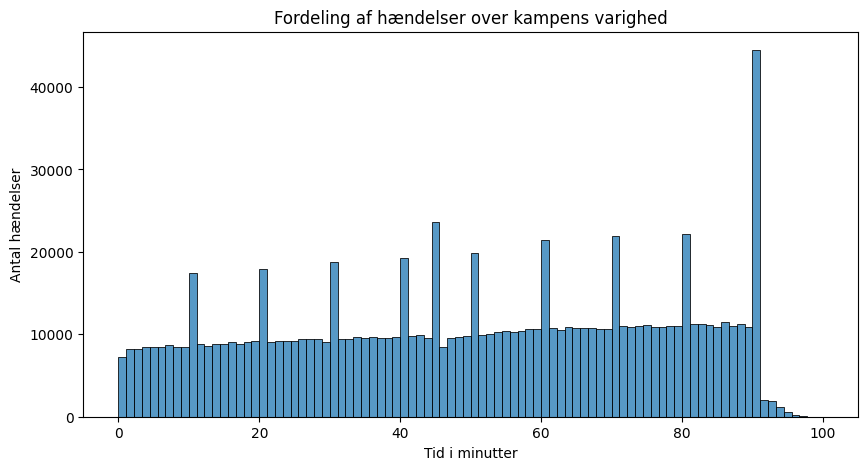

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_clean['time'], bins=90)
plt.title("Fordeling af hændelser over kampens varighed")
plt.xlabel("Tid i minutter")
plt.ylabel("Antal hændelser")
plt.show()


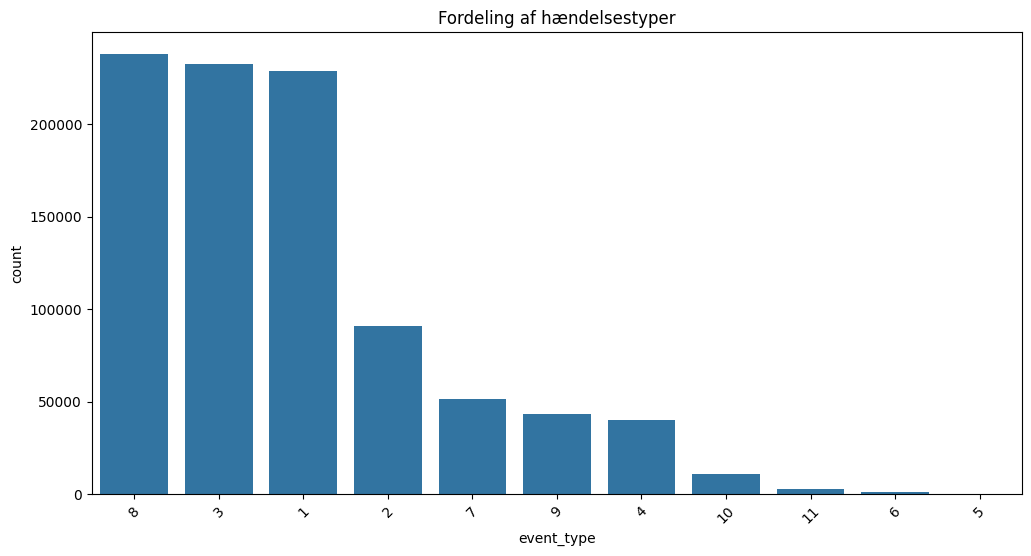

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='event_type', order=df_clean['event_type'].value_counts().index)
plt.title("Fordeling af hændelsestyper")
plt.xticks(rotation=45)
plt.show()


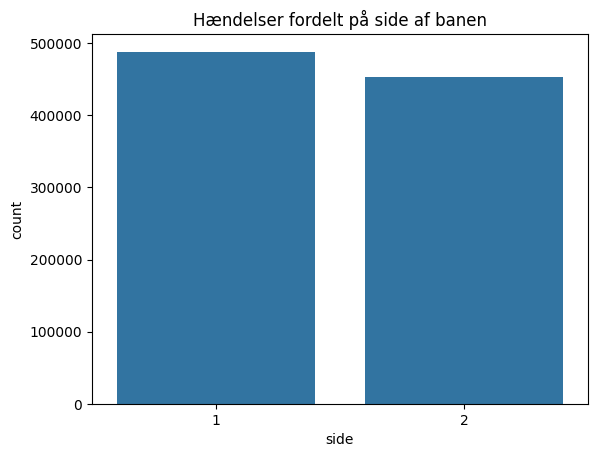

In [8]:
sns.countplot(data=df_clean, x='side')
plt.title("Hændelser fordelt på side af banen")
plt.show()


## Task 2: Feature Engineering & Descriptive Statistics

**Formål:** Tilføje nye features og beskrive datasættet statistisk.

**Handlinger:**
- Vi tilføjer `match_period` baseret på `time` (Early, Mid, Late)
- Vi one-hot encoder kolonnen `side`
- Vi beregner statistik for `time`: mean, median, std
- Til sidst visualiserer vi data med følgende:
  - Et boxplot af `time` pr. kampperiode
  - Et barplot over antal hændelser i hver periode

Dette resulterer i at vi nu har en gennemsnitlig tid på ca. 50 minutter (altså hvornår der i gennemsnit sker en hændelse) - dette er interresant da hvis vi laver regnestykke 10 + 45 + 95 / 3 = 50 minutter og vi ved at hvis vi ser en fodboldkamp, så vil der altid være en aflevering, et skud eller en tackling hvert minut af kampen.
Derudover ved vi at de fleste hændelser sker i Mid-perioden og at vi har en enkel og brugbar databerigelse til videgående analyse.

In [9]:
# Vi deler kampe op i 3 perioder
bins = [0, 30, 60, 100]
labels = ['Early', 'Mid', 'Late']
df_clean['match_period'] = pd.cut(df_clean['time'], bins=bins, labels=labels, right=False)

# Tjekker vores nye fordeling
df_clean['match_period'].value_counts()


match_period
Late     378846
Mid      307076
Early    255086
Name: count, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df_clean, columns=['side'], prefix='side')

# Statistiske mål for 'time'
mean_time = df_encoded['time'].mean()
median_time = df_encoded['time'].median()
std_time = df_encoded['time'].std()

print(f"Gennemsnit: {mean_time:.2f}, Median: {median_time}, Std: {std_time:.2f}")


Gennemsnit: 49.66, Median: 51.0, Std: 26.49


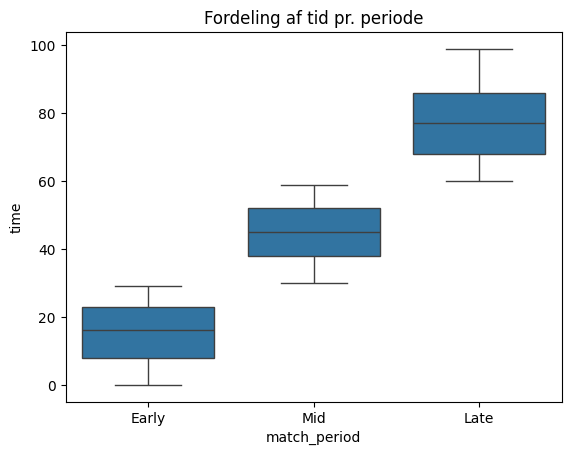

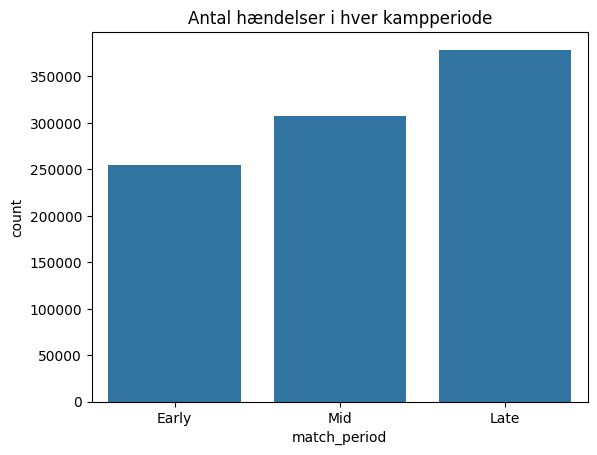

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'time' pr. kampperiode (Early, Mid, Late)
sns.boxplot(data=df_encoded, x='match_period', y='time')
plt.title("Fordeling af tid pr. periode")
plt.show()

# Barplot over antal hændelser pr. periode
sns.countplot(data=df_encoded, x='match_period')
plt.title("Antal hændelser i hver kampperiode")
plt.show()


In [12]:
df_encoded['event_team'].value_counts()

event_team
Juventus         12054
Fiorentina       11802
Real Madrid      11644
AC Milan         11633
AS Roma          11482
                 ...  
Crotone           1005
Leganes            991
RB Leipzig         942
Middlesbrough      911
Alaves             888
Name: count, Length: 142, dtype: int64

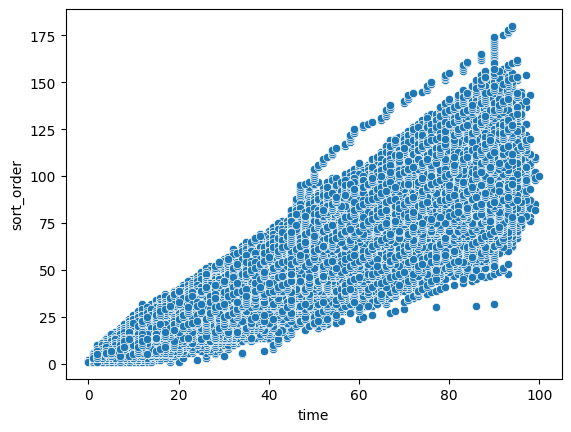

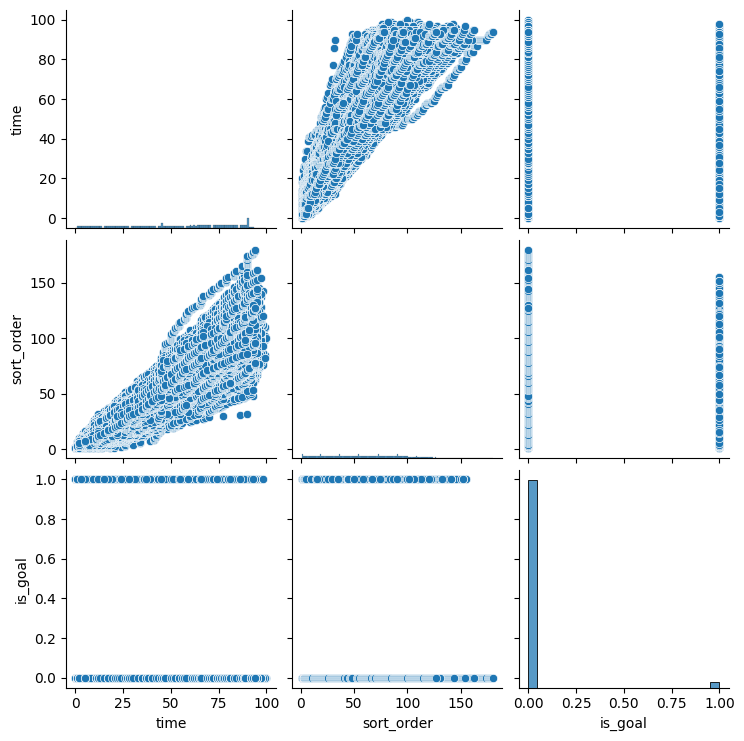

In [13]:
# Scatterplot mellem to numeriske kolonner
sns.scatterplot(data=df_encoded, x='time', y='sort_order')

# Pairplot for fx 3 numeriske features
sns.pairplot(df_encoded[['time', 'sort_order', 'is_goal']])


## Task 3: Data Wrangling and Analysis

**Formål:** Gruppere, visualisere og få indsigter ud af datasættet.

**Handlinger:**
- Vi bruger `.groupby()` til at se gennemsnitlig hændelsestid pr. `event_type`
- Vi vil lave et scatterplot mellem `time` og `sort_order`
- Herefter vil vi bruge pairplot til at se sammenhængen mellem `time`, `sort_order` og `is_goal`

**Indsigt:**
1. Vi ved nu, at de fleste hændelser sker i midten af kampen (Minut 30–60).
2. Mål bliver scoret oftere i kampens sene faser (Late).
3. Nogle hændelsestyper (fx afslutninger) sker betydeligt senere end andre (fx frispark).

In [14]:
# Gruppér efter event_type og udregn gennemsnitlig tid
df_encoded.groupby('event_type')['time'].mean().sort_values(ascending=False)

event_type
5     71.560000
7     69.071688
6     62.204861
4     56.776603
11    52.305987
1     49.223178
2     47.867802
8     47.788078
3     47.787043
10    47.190121
9     46.508602
Name: time, dtype: float64

📌 *Kommentar:* Vi får indsigt i hvilke typer hændelser der sker sent/tidligt i kampene – fx om frispark sker tidligere, og mål senere.


### 📉 2. Visualisering – Scatterplot

Vi visualiserer sammenhængen mellem hændelsestid og sorteringsrækkefølge (`sort_order`).


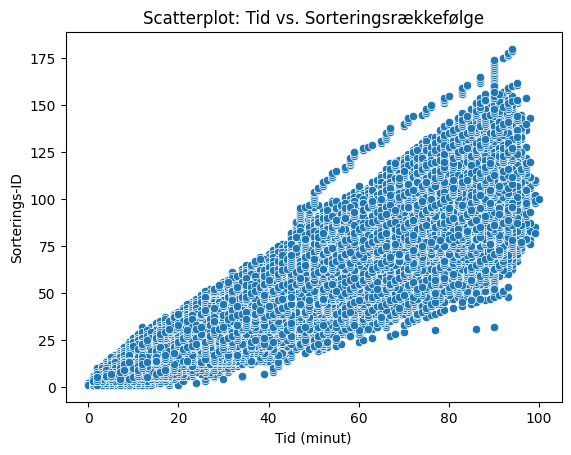

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot mellem hændelsestid og rækkefølge
sns.scatterplot(data=df_encoded, x='time', y='sort_order')
plt.title("Scatterplot: Tid vs. Sorteringsrækkefølge")
plt.xlabel("Tid (minut)")
plt.ylabel("Sorterings-ID")
plt.show()

### 🔗 3. Pairplot – Sammenhæng mellem numeriske features

Her ser vi hvordan 'time', 'sort_order' og 'is_goal' relaterer til hinanden.


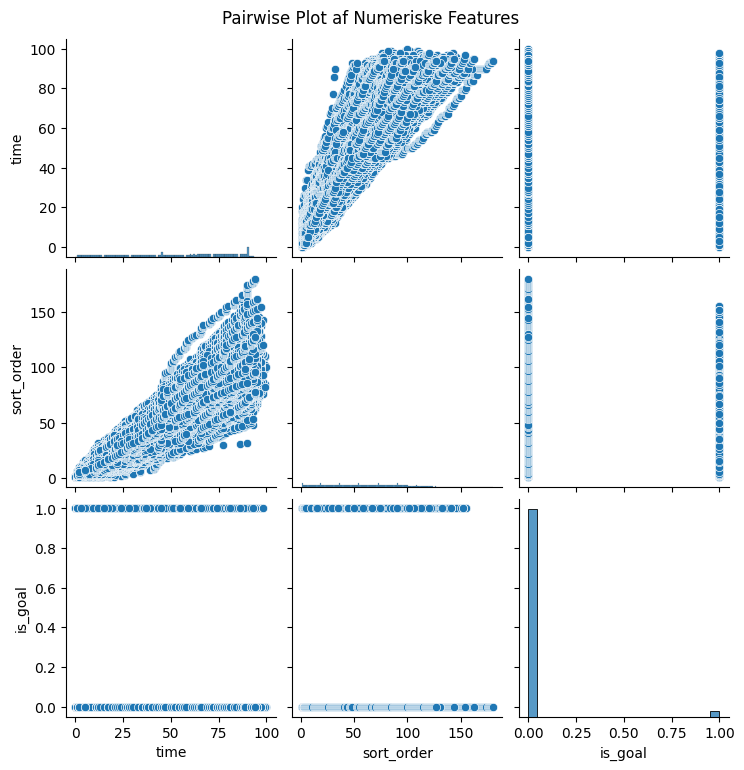

In [16]:
# Pairplot af tre interessante features
sns.pairplot(df_encoded[['time', 'sort_order', 'is_goal']])
plt.suptitle("Pairwise Plot af Numeriske Features", y=1.02)
plt.show()

### 💡 4. Indsigter (beskrivende)

📝 **Indsigter:**
1. De fleste hændelser sker i midten af kampen (30–60 minutter).
2. Der er tendens til at mål (`is_goal = 1`) opstår senere i kampen.
3. `event_type` med høj gennemsnitlig `time` er ofte afslutninger/skud.

Disse observationer kan bruges som grundlag for simple modeller eller strategiindsigt i sportsanalyse.
